In [33]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%precision 3
%matplotlib inline

# 連続型の説明変数を1つ持つモデル(単回帰)

In [34]:
beer = pd.read_csv('../data/5-1-1-beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


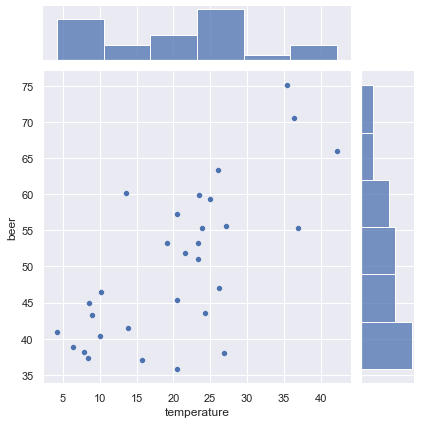

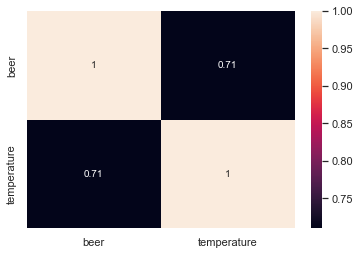

In [35]:
sns.jointplot(data=beer, x='temperature', y='beer')
plt.show()
sns.heatmap(data=beer.corr(), annot=True)
plt.show()

## モデルの構築

以下のビールの売上モデルを構築する

$$ \mathcal{ビールの売上 \sim N(\beta_0+\beta_1\times 気温, \sigma^2)} $$

* 応答変数にビールの売上を説明変数として気温を用いた正規線形モデル
* パラメタ推定としては、式にある係数`\beta_0,\beta_1`を推定する(`\sigma^2`は局外パラメタであるため無視)


In [36]:
# ols=OLS(Ordinary Least Squares)=最小二乗法
lm_model = smf.ols(formula="beer ~ temperature", data=beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.11e-05
Time:                        20:15:18   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Intercept: `\beta_0`=切片
* temperature: `\beta_1`=傾き
  * **Coef**: 係数の値
  * **std err**: 係数の標準誤差
  * **t**: t値
  * **P>|t|**: 帰無仮説を「係数の値が0である」とした時のp値
  * **[0.025**: 95%信頼区間における下側信頼限界
  * **[0.975**: 95%信頼区間における上側信頼限界

- 解釈
  - p値は、あまりにも小さすぎて桁落ちで0となっていることから、気温にかかる係数は有意に0とは異なると判断できる
  - 気温の係数の値が`0.7654`となっていることから、気温が上がるとビールの売上が上がると判断できる


* Dep. Variable: 応答変数の名称
* Model - Method: 通常の最小二乗法を使ったという説明
* Date - Time: モデルが推定された日時
* No.Observations: サンプルサイズ
* Df Residuals: サンプルサイズから推定されたパラメタの数を引いたもの
* Df Model: 用いられた説明変数
* Covariance Type: 共分散のタイプ。特に指定してなければnonrobustになる
* R-Squared - Adj.R-Squared: 決定係数と自由度調整済み決定係数
* F-statistic - Prob(F-statistic): 分散分析の結果
* Log-Likelihood: 最大化対数尤度
* AIC: 赤池の情報量基準
* BIC: ベイズ情報量基準

## AICによるモデル選択

In [37]:
null_model = smf.ols(formula="beer ~ 1", data=beer).fit()
print(f'AIC for NULL model: {null_model.aic}')
print(f'AIC               : {lm_model.aic}')

AIC for NULL model: 227.94194972563105
AIC               : 208.90902935575437


**説明変数入りのモデルの方が小さなAICとなったので、「気温という説明変数があった方が、予測精度が高くなるのではないか」と判断**

$$ AIC = -2 \times (最大化対数尤度-推定されたパラメタの個数) $$


In [38]:
print(f'対数尤度: {lm_model.llf}')
print(f'推定されたパラメタの数: {lm_model.df_model + 1}')
print(f'AIC: {-2 * (lm_model.llf - (lm_model.df_model + 1))}')

対数尤度: -102.45451467787719
推定されたパラメタの数: 2.0
AIC: 208.90902935575437


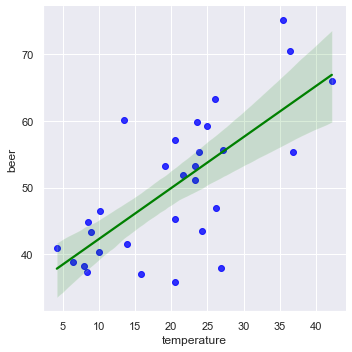

In [39]:
# seabornによる回帰直線の図示
sns.lmplot(data=beer, x="temperature", y="beer",
           scatter_kws={"color": "blue"},
           line_kws={"color": "green"})
# 網かけ部分は回帰直線の95%信頼区間

## モデルによる予測

In [40]:
# 引数に何も指定しない場合、訓練データへの当てはめ値がそのまま出力される
# lm_model.predict()
lm_model.predict(pd.DataFrame({"temperature": [0]}))

0    34.610215
dtype: float64

In [41]:
# 推定されたパラメタ
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [42]:
# 実際に予測値が (beta0 + beta1 * 気温) の数式に一致しているかを確認
temperature = 20
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]

print(f'model_predict: {lm_model.predict(pd.DataFrame({"temperature": [temperature]}))}')
print(f'math_calculate: {beta0 + beta1 * temperature}')

model_predict: 0    49.918767
dtype: float64
math_calculate: 49.91876701095053


## 残差の取得

* モデルの評価は主に残差チェックを通して行われる(最小二乗法など)
* 正規線形モデルの場合は、残差が平均0の正規分布に従うはずであるため、その通りになっているかをチェックする


In [43]:
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [44]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [45]:
resid_hat = (beer.beer - y_hat)
resid_hat.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [46]:
resid_hat = (beer.beer - y_hat)
# resid と一致していることがわかる
diff = (resid_hat - resid)
diff.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

## 決定係数

* R-Squaredが決定係数と呼ばれる指標
* 決定係数は手持ちのデータへのモデルの当てはまりの度合いを評価した指標

$$ R^2 = \frac{\sum^N_{i=1}(\hat{y}-\mu)^2}{\sum^N_{i=1}(y-\mu)^2} $$

モデルによる推測値が応答変数の実際の値と一致していれば、R^2は1になる

In [47]:
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

sp.sum((yhat - mu)**2) / sp.sum((y - mu)**2)

/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_4553/342876886.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mu = sp.mean(beer.beer)
/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_4553/342876886.py:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum((yhat - mu)**2) / sp.sum((y - mu)**2)


0.504

決定係数の分母は、以下のように分解することができる

$$ \sum^N_{i=1}(y-\mu)^2 = \sum^N_{i=1}(\hat{y}-\mu)^2 + \sum^N_{i=1}residuals^2 $$

応答変数の変動の大きさΣ(y-μ)^2を、モデルで説明できた変動と、モデルで説明できなかった残差平方和で分けることができるということ

そのため、**決定係数は全体の変動の大きさに占める、モデルで説明できた変動の割合**と解釈できる

また、上記の関係から以下のようにも計算することができることがわかる

$$
R^2 = 1-\frac{\sum^N_{i=1}residuals^2}{\sum^N_{i=1}(y-\mu)^2}
$$


In [48]:
print(f'{sp.sum((yhat-mu)**2) + sum(resid**2)}')
print(f'{sp.sum((y-mu)**2)}')

3277.114666666672
3277.1146666666655


/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_4553/276144848.py:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(f'{sp.sum((yhat-mu)**2) + sum(resid**2)}')
/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_4553/276144848.py:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(f'{sp.sum((y-mu)**2)}')


上記のような関係があるため、決定係数は以下のように表現できる

$$
 R^2 = \frac{\sum^N_{i=1}residuals^2}
 {\sum^N_{i=1}(y-\mu)^2}
$$

## 自由度調整済み決定係数

- 説明変数の数が増えるという罰則を組み込んだ決定係数を**自由度調整済み決定係数**と呼ぶ
- 決定係数は説明変数の数を増やせば増やすほど大きな値になる
  - 決定係数を高めることにこだわる場合、過学習を起こすため調整が必要になる

$$
R^2 = \frac{\sum^N_{i=1}residuals^2/(N-s-1)}
{\sum^N_{i=1}(y-\mu)^2/(N-1)}
$$

In [49]:
N = len(beer.beer)
s = 1

print(1 - ((sp.sum(resid**2) / (N - s - 1)) / (sp.sum((y - mu)**2) / (N - 1))))
print(lm_model.rsquared_adj)

0.48624358459908534
0.48624358459908534


/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_4553/2013832766.py:4: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(1 - ((sp.sum(resid**2) / (N - s - 1)) / (sp.sum((y - mu)**2) / (N - 1))))


/Users/k-kakimoto/dev/ml_samples/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

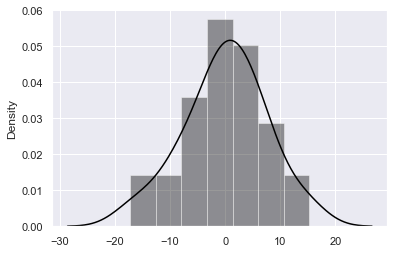

In [50]:
# 残差の図示
sns.distplot(resid, color='black')

/Users/k-kakimoto/dev/ml_samples/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


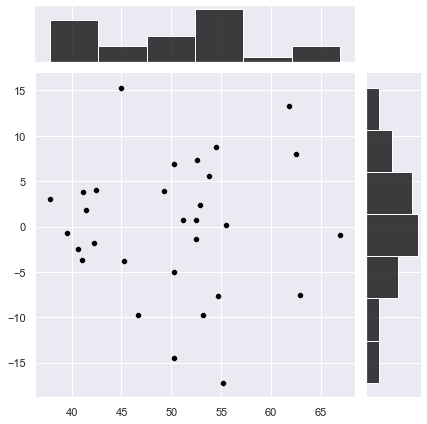

In [51]:
sns.jointplot(
    lm_model.fittedvalues,
    resid,
    joint_kws={'color': 'black'},
    marginal_kws={'color': 'black'},
)

## Q-Qプロット

- 理論上の分位点と実際のデータの分位点を散布図としてプロットしたグラフを**Q-Qプロット**と呼ぶ
- 理論上の分位点と実際のデータの分位点を求め、両者を比較することで残差が正規分布に近いかを視覚的に判断できる



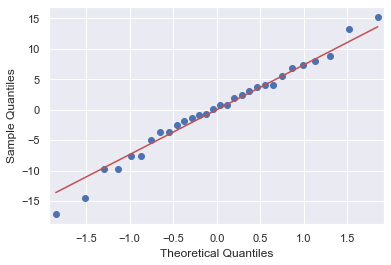

In [52]:
fig = sm.qqplot(resid, line='s')

In [53]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [54]:
# 累積確率
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [55]:
# 正規分布の%点
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

## 残差のチェック

### 歪度

- ヒストグラムの左右非対称さの方向とその程度を測る指標
- 歪度が0よりも大きければ右の裾が長くなる(正規分布は左右対称であるため、この値が0となる)

$$ Skew = \text{E}(\frac{(x-\mu)^3}{\sigma^3}) $$

### 尖度

- ヒストグラムの中身の周囲部分の尖度を測る指標
- 値が大きいほど尖っていることを示す(正規分布の尖度は3となる)

$$ Kurtosis = \text{E}(\frac{(x-\mu)^4}{\sigma^4}) $$

### Durbin-Watson

- Durbin-Watsonの値は、残差の自己相関を測る指標である
- 残差に自己送還があると、係数のt検定の結果などが信用できなくなる
  - そのため、自己相関があるかどうかを確認する必要がある


